# Reloading ipynb

In [7]:
%load_ext autoreload
%autoreload 2

# Imports 

In [1]:
from pathlib import Path

from src.constants import TARGET_COL_HEART
from src.data_utils import load_data, split_features_target, get_column_types
from src.eda_utils import (numeric_summary, categorical_summary,
                           boxplots, countplots, plot_class_balance,
                           pearson_heatmap, chi2_categorical, eda_memo)
import pandas as pd

## Load Datasets

In [2]:
DATA_DIR = Path("data")
REPORTS_DIR = Path("reports")

df_train = load_data('data/heart_1_train.csv')
df_test  = load_data('data/heart_1_test.csv')
df_full  = load_data('data/heart_full.csv')

# Spliting datasets

In [3]:
X_train, y_train = split_features_target(df_train, TARGET_COL_HEART)
X_test,  y_test  = split_features_target(df_test,  TARGET_COL_HEART)

num_cols, cat_cols = get_column_types(X_train, cat_threshold=5)

print("Numerical:", num_cols)
print("Categorical:", cat_cols)

Numerical: ['cholesterol_level', 'systolic_pressure', 'daily_cigarettes', 'diastolic_pressure', 'heart_rate', 'mass_index', 'blood_sugar_level', 'age', 'glucose', 'total_cigarettes']
Categorical: ['blood_pressure_medication', 'stroke_history', 'hypertension_history', 'smoking_status', 'diabetes_history', 'education_level', 'gender', 'high_blood_sugar']


# Summaris

In [4]:
num_stats = numeric_summary(X_train[num_cols])
cat_stats = categorical_summary(X_train, cat_cols)

# Visuals

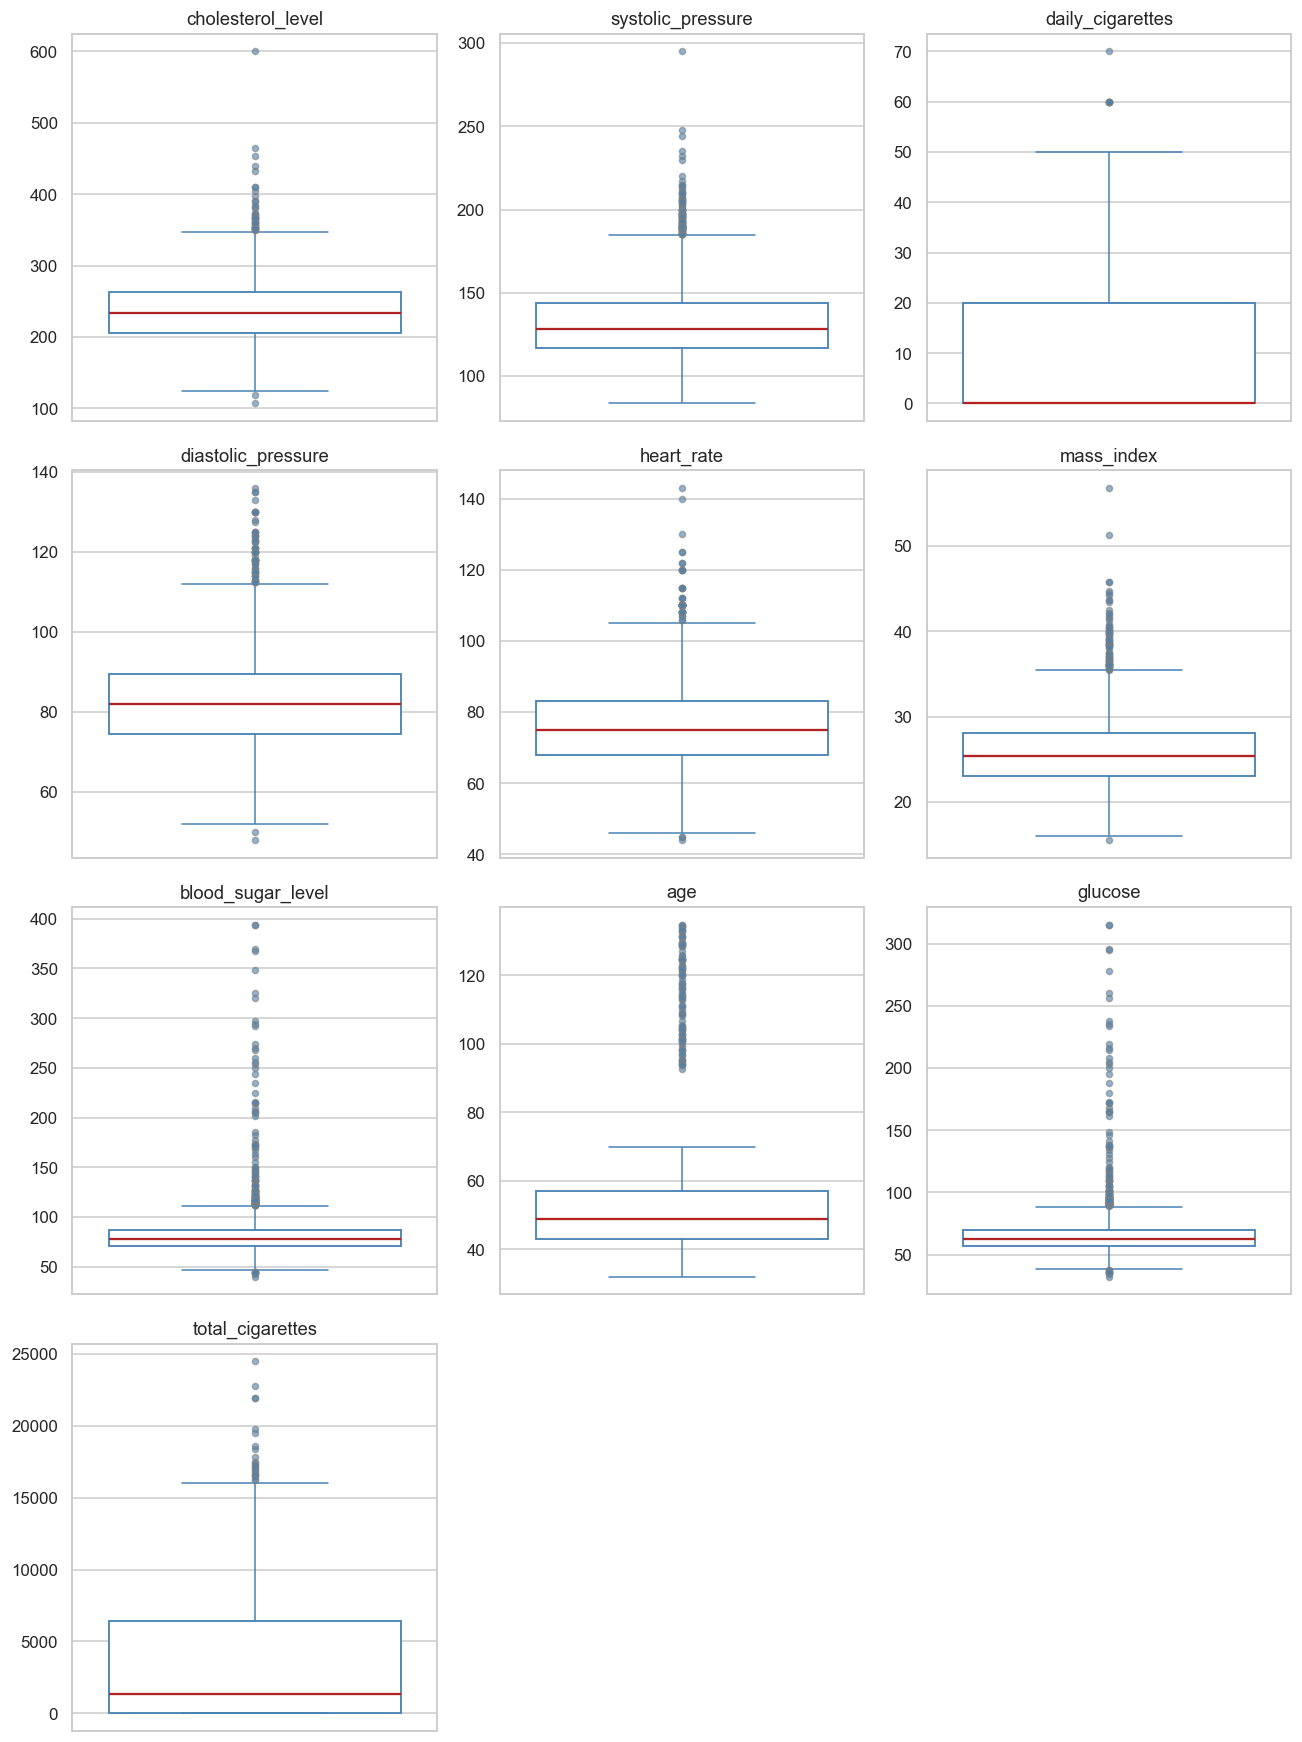

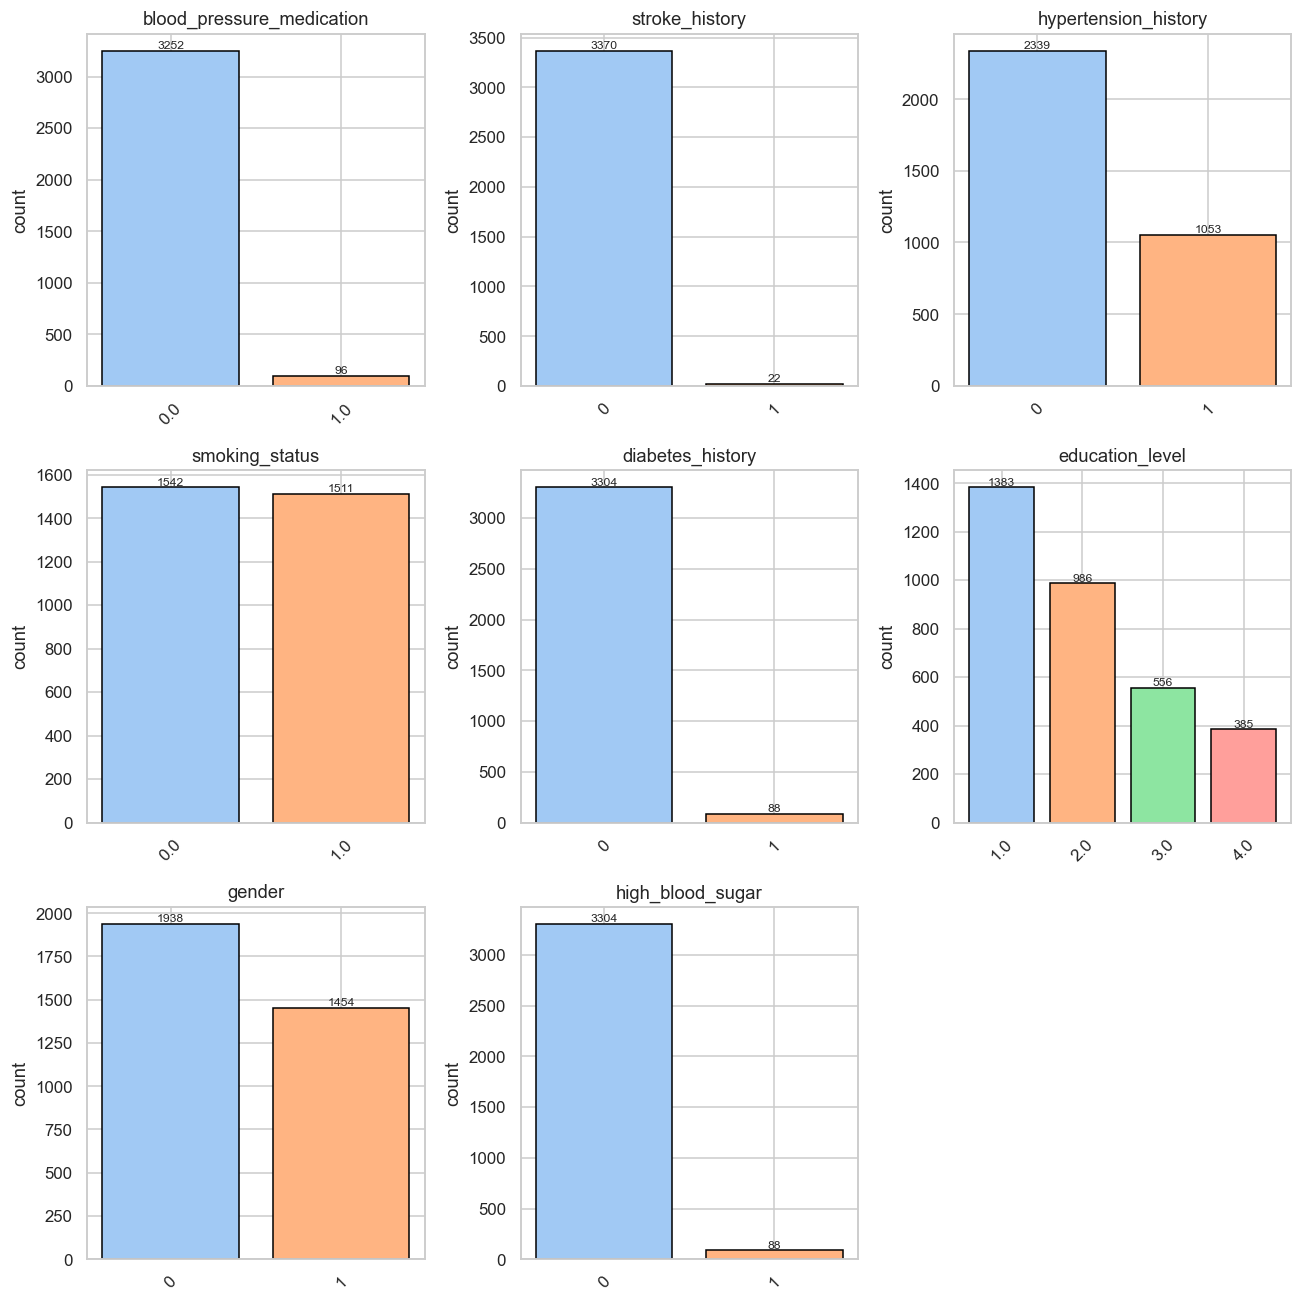

In [5]:
boxplots(X_train, num_cols, save_dir=REPORTS_DIR)
countplots(X_train, cat_cols, save_dir=REPORTS_DIR)

# Balancing

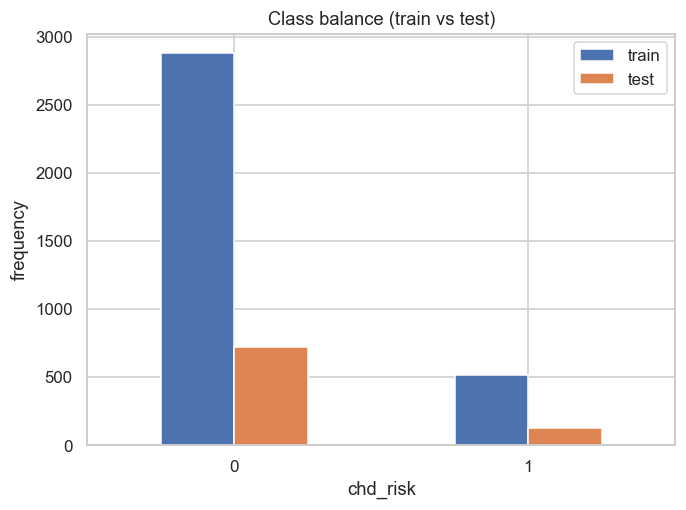

In [6]:
plot_class_balance(y_train, y_test, save_dir=REPORTS_DIR)

# Corelation

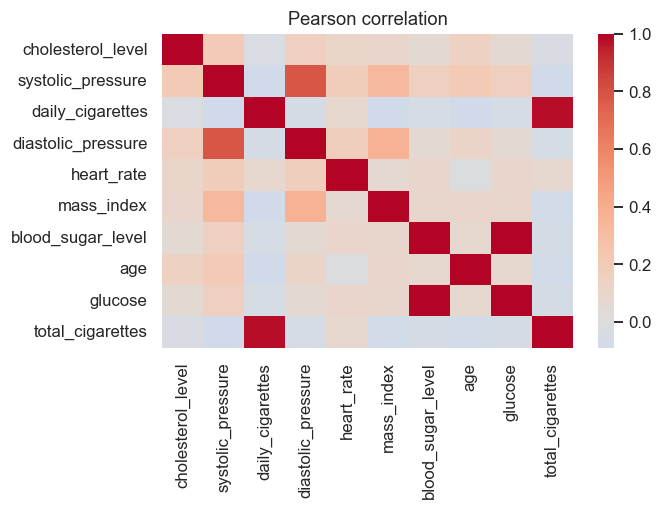

In [7]:
corr_mat = pearson_heatmap(X_train, num_cols, save_dir=REPORTS_DIR)
chi2_df = chi2_categorical(
    X_train, cat_cols,
    save_path=str(REPORTS_DIR / "chi2_categorical.csv")
)

# memo

In [9]:
memo = eda_memo(num_stats, cat_stats,
                pd.concat([y_train.value_counts(), y_test.value_counts()], axis=1),
                corr_mat, chi2_df)
print(memo) 

Potential outliers in: cholesterol_level, systolic_pressure, daily_cigarettes, diastolic_pressure, heart_rate, mass_index, blood_sugar_level, age, glucose, total_cigarettes.
High collinearity among: daily_cigarettes, blood_sugar_level, glucose, total_cigarettes.
Some categorical features show strong dependencies.
